In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

plt.style.use('seaborn')

In [55]:
# load cifar10 dataset
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()

In [8]:
train_x[:10, :, :, :].shape

(10, 32, 32, 3)

(-0.5, 31.5, 31.5, -0.5)

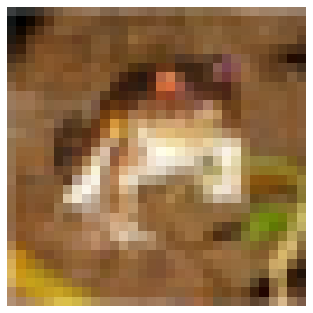

In [14]:

img = train_x[0]
img = img.reshape(32, 32, 3)
plt.imshow(img)
plt.axis('off')
plt.show()



<Figure size 576x576 with 0 Axes>

(-0.5, 95.5, 95.5, -0.5)

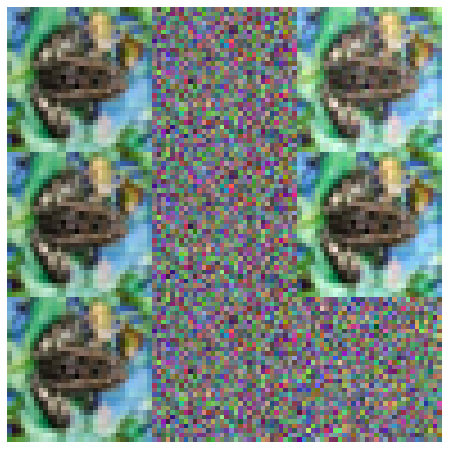

In [35]:

img = train_x[200]
img = img.reshape(32, 32, 3)
img = img /255.0

noise = np.random.normal(0, 0.1, img.shape)
noise = (noise - noise.min())/(noise.max()-noise.min())

# overlay noise onto image
noisy = np.clip((img + noise*0.2), 0, 1)

# noise multiplied by image
noisy2 = np.clip(img*( 1 + noise * 0.2), 0, 1)

# norm noise
# noisy3 = (noise - noise.min())/(noise.max()-noise.min())

plt.figure(figsize=(8, 8))
plt.imshow(
    np.vstack((
        np.hstack((img, noise, noisy)),
        np.hstack((img, noise, noisy2)),
        np.hstack((img, noise, noisy3)),
    ))
)
plt.axis('off')
plt.show()


In [78]:
# building a Gaussian Noise generator for images

def add_noise(img, noise_scale):

    noise = np.random.normal(0, noise_scale, img.shape)
    noise = (noise - noise.min())/(noise.max()-noise.min())

    return np.clip(img * (1 + noise * 0.2), 0, 1), noise


In [72]:

X = train_x / 255.0
X = X.reshape(50000, 32, 32, 3)

X.shape

(50000, 32, 32, 3)

(-0.5, 63.5, 31.5, -0.5)

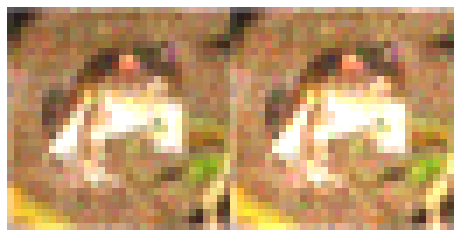

In [82]:

adding_noise = add_noise(X[0], 0.1)

plt.imshow(
    np.hstack((X[0], adding_noise[0]))
)
plt.axis('off')

<Figure size 576x576 with 0 Axes>

(-0.5, 95.5, 31.5, -0.5)

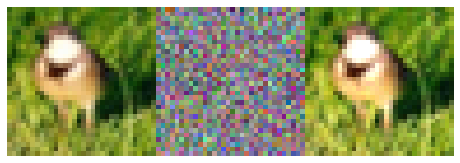

(-0.5, 95.5, 31.5, -0.5)

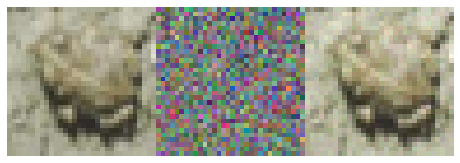

(-0.5, 95.5, 31.5, -0.5)

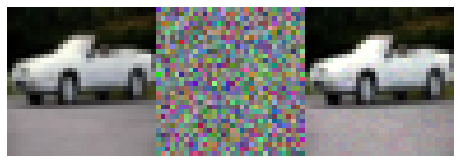

(-0.5, 95.5, 31.5, -0.5)

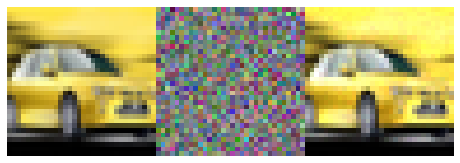

(-0.5, 95.5, 31.5, -0.5)

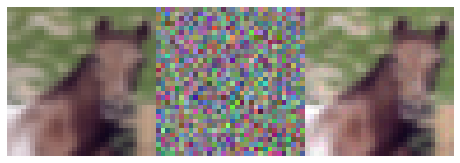

In [52]:
plt.figure(figsize=(8,8))
for image in range(5):
    img = train_x[np.random.randint(0, train_x.shape[0])]
    img = img.reshape(32, 32, 3)
    img = img / 255.0
    noisy, noise = add_noise(img, 0.1)
    plt.imshow(
        np.hstack((
            img,
            noise,
            noisy
            ))
    )
    plt.axis('off')
    plt.show()

In [63]:
# iterate X and add noise
noise_scale = 0.1
X = np.array([add_noise(img, noise_scale) for img in X])
X.shape

(50000, 2, 32, 32, 3)

### Standard GAN loss function (min-max GAN loss)

$ E_x[\log(D(x))] + E_z[\log(1 - D(G(z)))] $

### Discriminator Loss Function
$  $
